Create data and data labels for each point

In [1]:
import sklearn
import collections
from collections import Counter
from sklearn.cluster import KMeans
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12, 3, 3, 3, 3]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 21, 40, 40, 40]
data = list(zip(x, y))
labels = ["dog", "dog", "cat", "dog", "dog", "cat", "cat", "dog", "cat", "cat", "dog", "horse", "horse", "horse"] 

Create function that runs kmeans with a range of clusters with the data, test the accuracy (inertia) of different cluster numbers representing the raw data using the elbow method, return the optimal number of clusters

In [2]:
def K(data):
    import kneed
    import sklearn
    from kneed import KneeLocator
    from sklearn.cluster import KMeans

    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
    return kl.elbow

In [3]:
K(data)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

3

Create function that plots kmeans data based on the data and elbow method

In [4]:
    def plotKMeans(data):
        import sklearn
        import matplotlib
        matplotlib.use('Qt5Agg')
        import matplotlib.pyplot as plt
        from sklearn.cluster import KMeans

        kmeans = KMeans(n_clusters=K(data))
        kmeans.fit(data)

        %matplotlib inline
        plt.scatter(x, y, c=kmeans.labels_)
        plt.show()
        
        print(kmeans.labels_)

In [5]:
#plotKMeans(data)

In [6]:
def labelClusters(data, labels):
    import sklearn
    import collections
    from collections import Counter
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=K(data))
    kmeans.fit(data)
    
    tDict = {}
    sDict = {}
    gSList = set(labels)
    glist = []
    
    if len(set(kmeans.labels_)) != len(gSList):
        return "ERROR: number of clusters does not match with number of labels!"
    
    #make dictionary of unique labels associated with clusters to later measure which is more associated with what clusters
    for x in gSList:
        glist.append(x)
        for l in range(len(gSList)):
            tDict[x + str(l)] = 0 #initialize total dictionary
            
            
    #put the actual values into dictionary 
    
    for b in range(len(labels)): 
        for t in tDict:
            if t[:len(t)-1] == labels[b] and t[len(t)-1:] == str(kmeans.labels_[b]):
                tDict[t] = tDict.get(t) + 1
                
    for t in range(len(glist)-1):
        if tDict[glist[t] + str(t)] > tDict[glist[t+1] + str(t)]:
            sDict[t] = glist[t]
            sDict[t+1] = glist[t+1]
        else:
            sDict[t] = glist[t+1]
            sDict[t+1] = glist[t]
        
    return sDict
    

In [7]:
labelClusters(data, labels)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

{0: 'horse', 1: 'horse', 2: 'cat'}

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

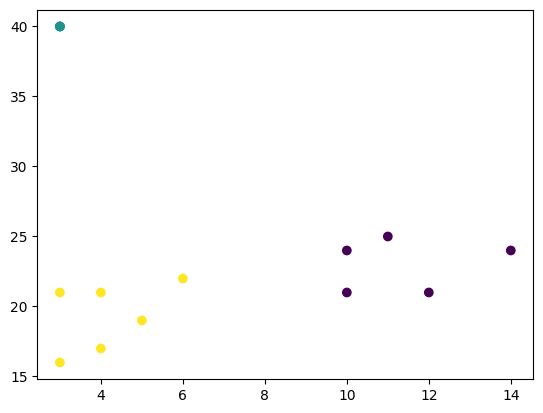

[2 2 0 2 2 0 0 2 0 0 2 1 1 1]


In [8]:
plotKMeans(data)